<h1>Sistem Rekomendasi Improvement Plan</h1>

<h2>Import Library</h2>

In [16]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<h2>Data Wrangling</h2>

In [20]:
df = pd.read_excel('datasets\INI.xlsx', header=1)
df.drop(columns=['NO'], inplace=True)

df['Division'].fillna(method='ffill', inplace=True)
df['Project Title'].fillna(method='ffill', inplace=True)
df['Location'].fillna(method='ffill', inplace=True)
df['Department'].fillna(method='ffill', inplace=True)

df['Location'] = df['Location'].str.capitalize()

df

,Division,Project Title,Improve,Location,Department
0,Division Operation,Optimalisasi Tambatan MCT dan Depo Marunda,1. Menambah 1 barge crane SPIL. Penambahan Bar...,Jakarta,Ship OPS [JKT]
1,Division Operation,Optimalisasi Tambatan MCT dan Depo Marunda,2. Koordinasi dengan PBM dalam rencana menamba...,Jakarta,Ship OPS [JKT]
2,Division Operation,Optimalisasi Tambatan MCT dan Depo Marunda,3. Menyiapkan area di depo Marunda untuk penam...,Jakarta,Ship OPS [JKT]
3,Division Operation,Optimalisasi Tambatan MCT dan Depo Marunda,4. Meningkatkan armada Haulage dengan menamba...,Jakarta,Ship OPS [JKT]
4,Division Operation,Reduce biaya repair container Jakarta,1. Identifikasi Container MNA (Empty Non Avala...,Jakarta,Yard OPS [JKT]
...,...,...,...,...,...
1046,Operation Division,Reduce Biaya Sewa Lahan Depo Cabang Tarakan,2. Membuat surat bersama dengan Pelayaran lain...,Tarakan,Regional West Department
1047,Operation Division,Reduce Biaya Sewa Lahan Depo Cabang Tarakan,3. Perubahan mekanisme sewa lahan dari lumpsum...,Tarakan,Regional West Department
1048,Operation Division,Reduce Biaya Sewa Lahan Depo Cabang Tarakan,4. Biaya storage full dibebankan ke relasi (re...,Tarakan,Regional West Department
1049,Operation Division,Reduce Biaya Sewa Lahan Depo Cabang Tarakan,5. Memberikan pemahaman ke JPT atas perubahan ...,Tarakan,Regional West Department


In [21]:
df['Improve'] = df['Improve'].str.replace(r'^\d+\.', '', regex=True)
df

,Division,Project Title,Improve,Location,Department
0,Division Operation,Optimalisasi Tambatan MCT dan Depo Marunda,Menambah 1 barge crane SPIL. Penambahan Barge...,Jakarta,Ship OPS [JKT]
1,Division Operation,Optimalisasi Tambatan MCT dan Depo Marunda,Koordinasi dengan PBM dalam rencana menambah ...,Jakarta,Ship OPS [JKT]
2,Division Operation,Optimalisasi Tambatan MCT dan Depo Marunda,Menyiapkan area di depo Marunda untuk penamba...,Jakarta,Ship OPS [JKT]
3,Division Operation,Optimalisasi Tambatan MCT dan Depo Marunda,Meningkatkan armada Haulage dengan menambah ...,Jakarta,Ship OPS [JKT]
4,Division Operation,Reduce biaya repair container Jakarta,Identifikasi Container MNA (Empty Non Avalaib...,Jakarta,Yard OPS [JKT]
...,...,...,...,...,...
1046,Operation Division,Reduce Biaya Sewa Lahan Depo Cabang Tarakan,Membuat surat bersama dengan Pelayaran lain u...,Tarakan,Regional West Department
1047,Operation Division,Reduce Biaya Sewa Lahan Depo Cabang Tarakan,Perubahan mekanisme sewa lahan dari lumpsum k...,Tarakan,Regional West Department
1048,Operation Division,Reduce Biaya Sewa Lahan Depo Cabang Tarakan,Biaya storage full dibebankan ke relasi (rela...,Tarakan,Regional West Department
1049,Operation Division,Reduce Biaya Sewa Lahan Depo Cabang Tarakan,Memberikan pemahaman ke JPT atas perubahan pe...,Tarakan,Regional West Department


In [40]:
kota = pd.unique(df['Location'])
kota

array(['Jakarta', 'Surabaya', 'Makassar', 'Timika', 'Jayapura',
       'Pekanbaru', 'Balikpapan', 'Gorontalo', 'Samarinda', 'Bitung',
       'Medan', 'Batam', 'Manokwari', 'Palu', 'Tarakan', 'Pontianak',
       'Sorong', 'Sampit', 'Biak', 'Serui', 'Banjarmasin', 'Padang',
       'Nunukan', 'Bau-bau', 'Nabire', 'Kaimana', 'Kendari', 'Berau',
       'Semarang', 'Ambon', 'Tual', 'Ternate', 'Batulicin', 'Merauke',
       'Fak-fak', 'Luwuk'], dtype=object)

In [22]:
df.describe()

,Division,Project Title,Improve,Location,Department
count,1051,1051,1051,1051,1051
unique,10,320,961,36,36
top,Operation Division,Optimalisasi pola muat container reefer dan dr...,Pengaturan pengisian CST 380,Surabaya,Regional West Department
freq,621,10,11,295,310


<h3>Visualisasi Data</h3>

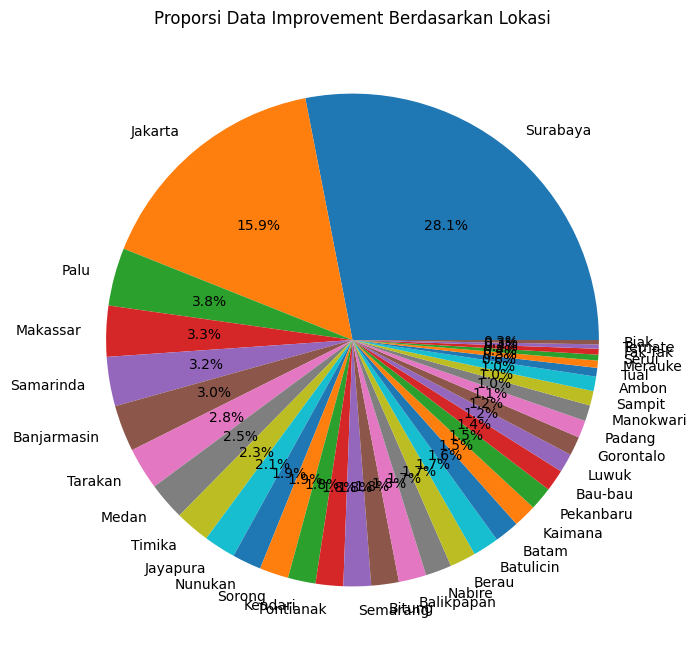

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
df['Location'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proporsi Data Improvement Berdasarkan Lokasi')
plt.ylabel('')
plt.show()

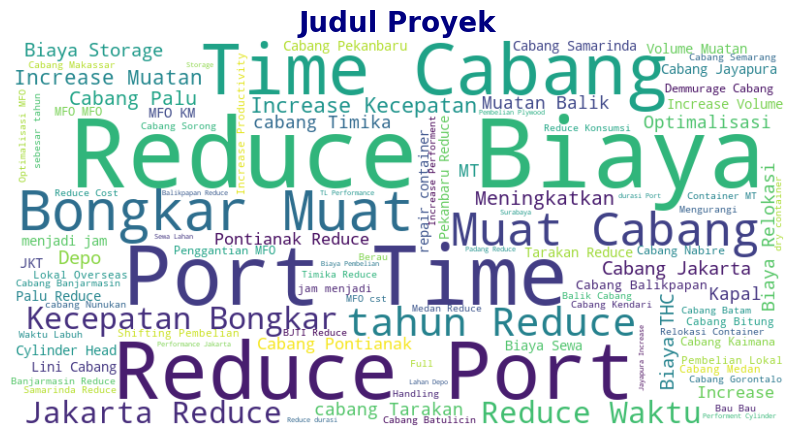

In [58]:
from wordcloud import WordCloud

all_text_project = ' '.join(df['Project Title'].dropna())
factory_project = StopWordRemoverFactory()
stopwords_project = factory_project.get_stop_words()

cleaned_project_title = ' '.join([word for word in all_text_project.split() if word.lower() not in stopwords])

wordcloud = WordCloud(width=800, height=400, background_color='white', contour_color='steelblue', contour_width=2,
                      colormap='viridis', max_words=100,).generate(cleaned_project_title)


plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Judul Proyek', fontsize=20, color='navy', fontweight='bold')
plt.show()


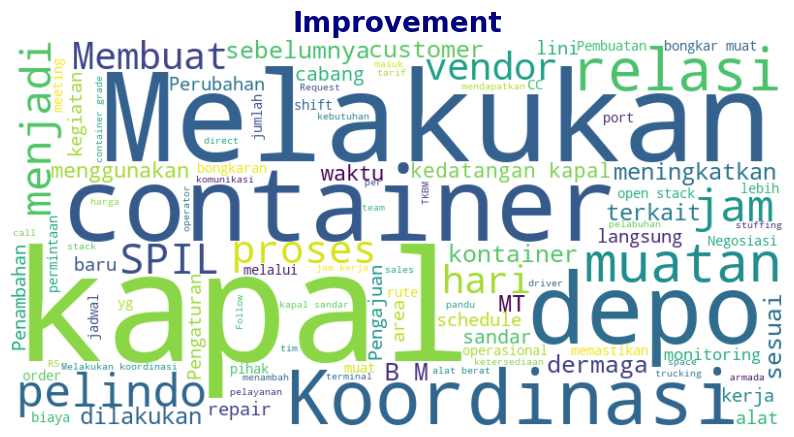

In [59]:
all_text_imporve = ' '.join(df['Improve'].dropna())
factory_improve = StopWordRemoverFactory()
stopwords_improve = factory_improve.get_stop_words()

cleaned_project_improve = ' '.join([word for word in all_text_imporve.split() if word.lower() not in stopwords])

wordcloud = WordCloud(width=800, height=400, background_color='white', contour_color='steelblue', contour_width=2,
                      colormap='viridis', max_words=100,).generate(cleaned_project_improve)


plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Improvement', fontsize=20, color='navy', fontweight='bold')
plt.show()

<h2>Data Preproccessing</h2>

In [25]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

In [26]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()] 
    tokens = [word for word in tokens if word not in stopwords]   
    return ' '.join(tokens)

In [27]:
df['Cleaned_Title'] = df['Project Title'].apply(preprocess_text)
df['Cleaned_Location'] = df['Location'].apply(preprocess_text)

<h2>Sistem Rekomendasi</h2>

In [28]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Title'] + ' ' + df['Cleaned_Location'])

In [35]:
def get_recommendations(project_title, location, top_n=15):
    query = preprocess_text(project_title + ' ' + location)
    query_vector = tfidf_vectorizer.transform([query])
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()
    related_docs_indices = cosine_similarities.argsort()[::-1]
    top_indices = related_docs_indices[:top_n]
    recommendations = df.iloc[top_indices]['Improve'].tolist()
    
    return recommendations

<h2> Contoh Penggunaan</h2>

ketikan judul proyek!

In [51]:
project_title = input("Masukkan judul proyek: ")
# location = input("Masukkan lokasi: ")
location = ''
title_fix = ''

title_split = project_title.split(';')
# print(title_split)

for prompt in title_split:
    if prompt.capitalize() in kota:
        location = prompt
    else: 
        title_fix = prompt

recommendations = get_recommendations(title_fix, location)

print("Rekomendasi untuk title '" + title_fix +"' pada lokasi " + location + ': ')
for i, recommendation in enumerate(recommendations, 1):
    print(f"{i}. {recommendation}")

Rekomendasi untuk title 'reduce cost' pada lokasi surabaya: 
1.  Menginformasikan ke customer untuk stripping luar di ambil ke CY BJTI   
2.  Pengajuan stack bongkaran di CY BJTI, dengan bongkaran lebih dari 100 box menggunakan CY baru di Mirah   
3.  Memindahkan order bongkar stripping Luar yang seharusnya stack di DEPO SPIL, dialihkan ke CY BJTI untuk diambil langsung oleh Customer    
4.  Melakukan performance review vendor trucking
    Before : Tidak tercatat dan tidak regular diukur
    After : Regular dicatat dan diukur
5.  Mencari vendor pembanding sebagai alternative vendor
6.  Menentukan metric performance untuk vendor
    Before : Volume, On-time
    After : On-time, Ritase, Truck Availability
7.  Sosialisasi atau edukasi keuntungan memakai kontainer 40' ke relasi baru dengan cara visit ke perusahaan relasi
8.  Rapat bersama EMKL lain di Baubau setiap bulan terkait potensi muatan yang dapat dimuat di 40 ft kepada relasi baru
9.  Follow up ke relasi baru untuk memaksimalkan mu